<a href="https://colab.research.google.com/github/lim-jr/ESAA/blob/main/1125%EA%B8%88%EA%B3%BC%EC%A0%9C_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C(303~310).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04 사이킷런 Linear Regression을 이용한 보스턴 주택 가격 예측

## 1. Linear Regression 클래스 -Ordinary Least Squares

* LinearRegression 클래스 : 예측값과 실제값 간의 RSS를 최소화하는 OLS 추정방식으로 구현한 클래스
  * 입력파라미터  
    1. fit_intercept : intercept(절편)값을 계산할것인지. 디폴트는 True. False로 지정하면 절편값은 0.
    2. normalize : 회귀를 수행하기 전에 입력데이터셋을 정규화할지. 디폴트는 False.
  * 속성 
    1. coef_ : fit() 메소드를 수행했을 때, 배열형태로 저장되는 회귀계수값
    2. intercept : intercept값




## 2. 회귀 평가 지표

* MAE = sigma|Yi-Yhat| /n
* MSE = sigma(Yi-Yhat)^2 /n
* RMSE = sqrt(MSE)
8 R^2 = 예측값 분산 / 실제값 분산, 1에 가까울수록 예측정확도가 높음

## 3. Linear Regression을 이용해 보스턴 주택 가격 회귀 구현

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [2]:
# boston 데이터셋 로드
boston = load_boston()
# boston 데이터셋 DF변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names) #X_feature

# boston 데이터셋의 target 배열은 주택가격임. 이를 DF에 추가
bostonDF['PRICE'] = boston.target #y_label
print("Boston 데이터셋 크기:", bostonDF.shape)
bostonDF.head()

Boston 데이터셋 크기: (506, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  print(i, feature)
  print(i/4)
  print(i%4)

0 RM
0.0
0
1 ZN
0.25
1
2 INDUS
0.5
2
3 NOX
0.75
3
4 AGE
1.0
0
5 PTRATIO
1.25
1
6 LSTAT
1.5
2
7 RAD
1.75
3


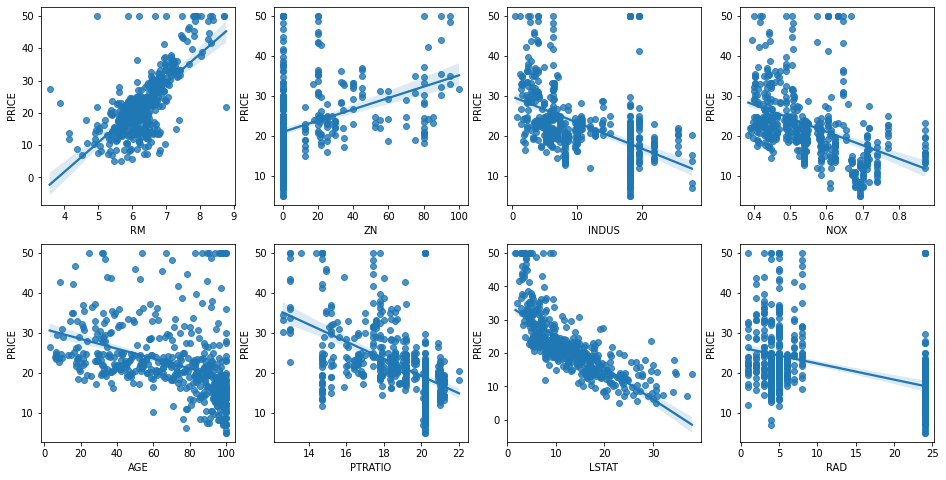

In [5]:
## 각 칼럼이 회귀결과에 미치는 영향이 어느정도인지 시각화 

# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4) #0~7을 4로 나눈 몫부분은 0/1
  col = i%4     #0~7을 4로 나눈 나머지부분 0~3
  # 시본의 regplot을 이용해 산점도와 선형회귀직선을 함께 표현
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])
  #         x축에 feature값들              그래프 위치좌표 (0,0)(0,1)(0,2)(0,3)/(1,0)(1,1)(1,2)(1,3)

* 산점도 결과 분석
  * RM과 LSTAT의 PRICE영향도가 가장 크게 두드러짐.
  * RM(방의개수)은 양의 선형관계가 나타난다.
  * LSTAT(하위계층의 비율)은 음의 선형관계가 나타난다.  

In [8]:
## 보스턴 주택가격의 회귀모델 생성 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


In [10]:
print('절편값: ', lr.intercept_)
print('회귀계수값: ', np.round(lr.coef_, 1))

절편값:  40.99559517216477
회귀계수값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [11]:
# 회귀계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스칼럼명에 유의

coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

* 위에서 그린 산점도의 결과분석과 비교했을 때, 회귀계수 결과분석
  * RM이 양의 값에서 회귀계수가 가장 크고
  * NOX가 음의 값에서 회귀계수가 가장 크다. 너무 커보인다. 
* 차츰 최적화를 수행하면서 피처의 coefficients의 변화도 같이 살펴본다.

In [12]:
## 5개의 폴드세트에서 cross_val_score()을 이용해, 교차검증으로 MSE, RMSE를 측정

from sklearn.model_selection import cross_val_score
y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE', axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5폴드세트로 MSE로 구한뒤, 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5) #음수값은 반환함
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(~~)로 반환된 값은 모두 음수
print('5 folds 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2)) 
print('5 folds 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds 평균 RMSE: 5.829
